<a href="https://colab.research.google.com/github/jyoti-2203/Python/blob/EDA/Bagnluru_Rent_Box_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Bengaluru_rent.csv')
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Independent Floor,kamakshipalya,"20,000",1140,Semi-Furnished,2 bathrooms
1,OWNER,2,BHK,Independent House,Kadugodi Industrial Area,"8,000",840,Semi-Furnished,2 bathrooms
2,OWNER,2,BHK,Independent House,Koramangala,"21,000",1000,Semi-Furnished,2 bathrooms
3,OWNER,1,BHK,Apartment,Sadduguntepalya,"9,000",550,Semi-Furnished,1 bathrooms
4,OWNER,3,BHK,Apartment,Chandapura,"17,000",1230,Furnished,3 bathrooms
...,...,...,...,...,...,...,...,...,...
23535,OWNER,1,BHK,Independent Floor,Bagalakunte,"6,000",500,Semi-Furnished,1 bathrooms
23536,OWNER,2,BHK,Independent House,Vijayanagar,"10,500",400,Semi-Furnished,1 bathrooms
23537,OWNER,2,BHK,Independent House,Hennur,"16,000",1100,Semi-Furnished,2 bathrooms
23538,OWNER,2,BHK,Apartment,Shanti Nagar,"24,000",1000,Semi-Furnished,2 bathrooms


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    23540 non-null  object
 1   bedroom        23540 non-null  int64 
 2   layout_type    23540 non-null  object
 3   property_type  23540 non-null  object
 4   locality       23540 non-null  object
 5   price          23540 non-null  object
 6   area           23540 non-null  int64 
 7   furnish_type   23540 non-null  object
 8   bathroom       23106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,bedroom,area
count,23540.000000,23540.000000
mean,1.954970,1140.767587
std,0.844619,674.878686
min,1.000000,100.000000
25%,1.000000,650.000000
50%,2.000000,1100.000000
75%,2.000000,1350.000000
max,15.000000,10800.000000


In [ ]:
df.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom'],
      dtype='object')

Let's convert price column from a string to float so it can used for an analysis.

In [ ]:
df['price'] = df['price'].str.replace(',','').astype(float)

Let's create a box plot of monthly charges or each property type.

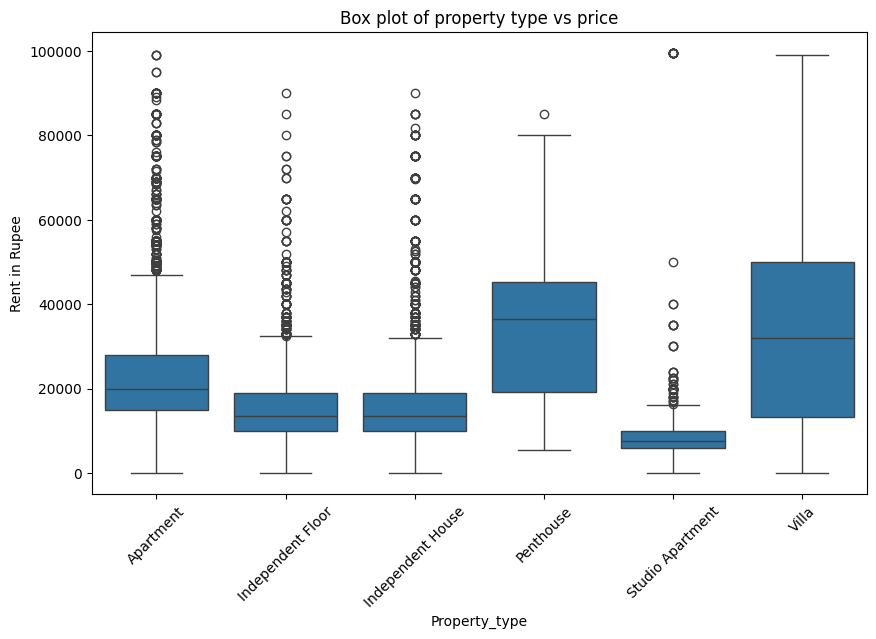

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'property_type', y = 'price', order = sorted(list(df['property_type'].unique())))
plt.title('Box plot of property type vs price')
plt.xlabel('Property_type')
plt.ylabel('Rent in Rupee')
plt.xticks(rotation = 45)
plt.show()

Here, for each box, from bottom to top:


The lower horizontal line is the minimum barring outliers,

The vertical line is the lower errorbar,

The upper horizontal line is the first quartile (Q1),

The horizontal line is the median,

The lower horizontal line is the third quartile (Q3),

The vertical line is the upper errorbar,

The upper horizontal line is the maximum barring outliers, and

The circled points are potential outliers.

There are no potential outliers below the minimum in our data.

But what does this box plot convey?

The first quartile (Q1) is the value below which 25% of our data lies; the third quartile (Q3) is the value below which 75% of our data lies. We can calculate these using the quantile() method.

We can calculate potential outliers using the IQR method. The interquartile range, or IQR, is the range in which the middle 50% of the data falls.

To calculate the IQR, you need to find the difference between the first and third quartiles of your data.

To remove potential outliers using the IQR method, we remove the data that is outside the following boundaries:

• Lower = Q1-1.5 × IQR

• Upper = Q3+1.5 × IQ

The Seaborn box plot considers the minimum and maximum values without the potential outliers to make the upper and lower ends of its box plot visually.



In [ ]:
def q1(x) : return x.quantile(0.25)
def q3(x) : return x.quantile(0.75)

price_by_property_type = df.groupby('property_type')['price'].agg(['median',q1,q3,'min','max' ])
price_by_property_type

,median,q1,q3,min,max
property_type,,,,,
Apartment,20000.0,15000.0,28000.0,1.0,99000.0
Independent Floor,13500.0,10000.0,19000.0,1.0,90000.0
Independent House,13500.0,10000.0,19000.0,1.0,90000.0
Penthouse,36500.0,19250.0,45250.0,5500.0,85000.0
Studio Apartment,7500.0,6000.0,10000.0,3.0,99500.0
Villa,32000.0,13250.0,50000.0,1.0,99000.0


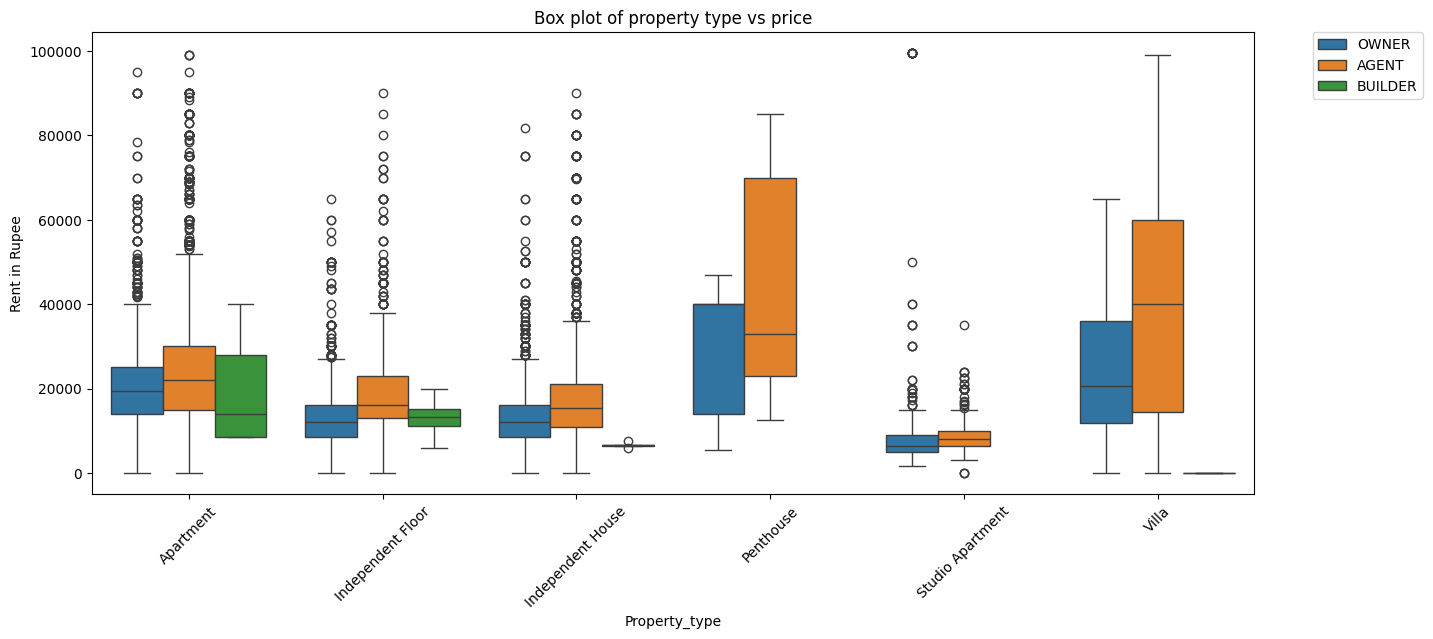

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'property_type', y = 'price', order = sorted(list(df['property_type'].unique())), hue ='seller_type')
plt.title('Box plot of property type vs price')
plt.xlabel('Property_type')
plt.ylabel('Rent in Rupee')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)
plt.show()